In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rnd
import cv2 as cv
from skimage.transform import resize
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import Javascript

#generando imagenes binarias

In [ ]:
def potunary(ui,ob):
  if ui!=ob:
    return 1
  else:
    return 0

def potpair(ui,uj,t):
  return min(abs(ui-uj),t)

def energy(L,L0,t):
  E=[]
  alt=np.shape(L)[0]
  anc=np.shape(L)[1]
  for i in range(alt):
    for j in range(anc):
      if i==alt-1:
        if j==anc-1:
          u=potunary(L[i,j],L0[i,j])
          E.append(u)
          continue
        else:
          u=potunary(L[i,j],L0[i,j])
          f=potpair(L[i,j],L[i,j+1],t)
          E.append(u+f)
      else:
        if j==anc-1:
          u=potunary(L[i,j],L0[i,j])
          a=potpair(L[i,j],L[i+1,j],t)
          E.append(u+a)
        else:
          u=potunary(L[i,j],L0[i,j])
          f=potpair(L[i,j],L[i,j+1],t)
          a=potpair(L[i,j],L[i+1,j],t)
          d=potpair(L[i,j],L[i+1,j+1],t)
          E.append(u+(a+d+f))
  return np.sum(E)


###Algoritmo de Metrópólis y homogeneización

In [ ]:
#Tamaño
alto=100
ancho=100

#Imagen binaria inicial con valores aleatorios
i0=np.random.choice([0.0,1.0],size=(alto,ancho))
ipos=np.array(i0)

#Temeperatura inicial
T0=4

#Parámetro de regualrización
t=0.8

Ep=[]
x=[]
w=np.zeros((alto,ancho))
v=np.zeros((alto,ancho))
i=0

In [ ]:
while i<30000:
  T=T0*0.99**i
  pos=[int(rnd.choice(range(alto))),int(rnd.choice(range(ancho)))]
  Eant=energy(ipos,i0,t)
  v=np.array(ipos)
  if ipos[pos[0],pos[1]]==0:
    try:
      ipos[pos[0]:pos[0]+2,pos[1]:pos[1]+2]=1
    except:
      ipos[pos[0],pos[1]]=1
      ipos[pos[0]-1,pos[1]]=1
      ipos[pos[0],pos[1]-1]=1
      ipos[pos[0]-1,pos[1]-1]=1
  else:
    try:
      ipos[pos[0]:pos[0]+2,pos[1]:pos[1]+2]=0
    except:
      ipos[pos[0],pos[1]]=0
      ipos[pos[0]-1,pos[1]]=0
      ipos[pos[0],pos[1]-1]=0
      ipos[pos[0]-1,pos[1]-1]=0
  
  Epos=energy(ipos,i0,t)

  if Epos<=Eant:
    w=np.array(ipos)
    x.append(w)
  elif Epos>Eant and rnd.uniform(0,1)<np.exp(-(Epos-Eant)/T):
    w=np.array(ipos)
    x.append(w)
  else:
    ipos=np.array(v)
    x.append(v)
  i+=1
  print(i)
  Ep.append(Epos)

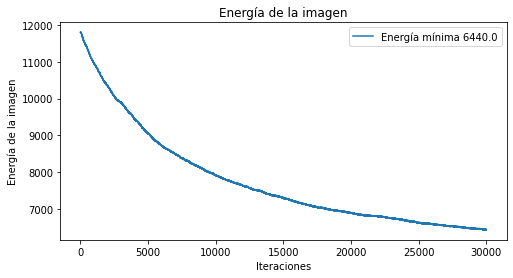

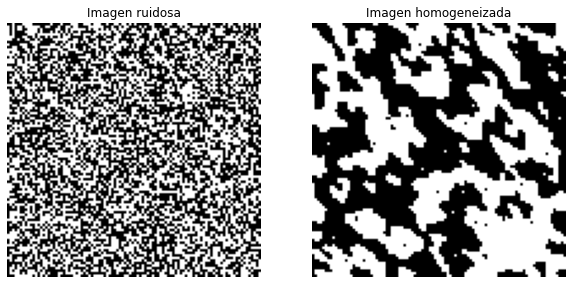

In [ ]:
plt.figure(figsize=(8,4))
plt.xlabel("Iteraciones")
plt.ylabel("Energía de la imagen")
plt.plot(Ep, label=f"Energía mínima {min(Ep)}")
plt.legend()
plt.title("Energía de la imagen")
plt.show()

fig,ax=plt.subplots(1,2)
fig.set_size_inches(10,8)

ax[0].imshow(i0,cmap="gray")
ax[0].set_title("Imagen ruidosa")
ax[0].axis("off")
ax[1].imshow(x[i-1],cmap="gray")
ax[1].axis("off")
ax[1].set_title("Imagen homogeneizada")
plt.show()

####Animación

In [ ]:
%%capture
fig,ax = plt.subplots();
def animate(i):
       ax.clear()
       ax.set_axis_off()
       ax.imshow(x[100*i],cmap="gray")
ani = animation.FuncAnimation(fig,animate,frames=300,interval=50,blit=False)
rc('animation', html='jshtml')

In [ ]:
Javascript('document.querySelector(".anim-state").state.value="once" ')
Javascript('document.querySelector(".anim-controls > button:nth-child(6)").click()')
ani

In [ ]:
ani.save("homogenea.mp4")